In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.core.pylabtools import figsize
from itertools import combinations

## 1. Erdos Renyi

> Each pair of nodes is connected with probability p

$\langle m \rangle=p\frac{n(n-1)}{2}$    
$\langle k \rangle=p(n-1) \approx pn$          
$\rho = p$

**Bernoulli trial**            
$P(k_i = k) = C_{n-1}^{k}p^k(1-p)^{n-1-k}$

Phase transition critical value $np = 1$

$p = $ clustering coefficient


In [0]:
def erdos_renyi(n,p,return_graph = True,from_adjacency = True):

    if from_adjacency:
        A = (np.random.random(size = (n,n)) < p).astype(int)

        if return_graph:
            return nx.from_numpy_array(A)

        return A

    else:
        G = nx.Graph()
        G.add_nodes_from(range(n))

        for n1,n2 in combinations(range(n),2):
            if np.random.random() < p:
                G.add_edge(n1,n2)
        return G

10 Nodes ER Graph


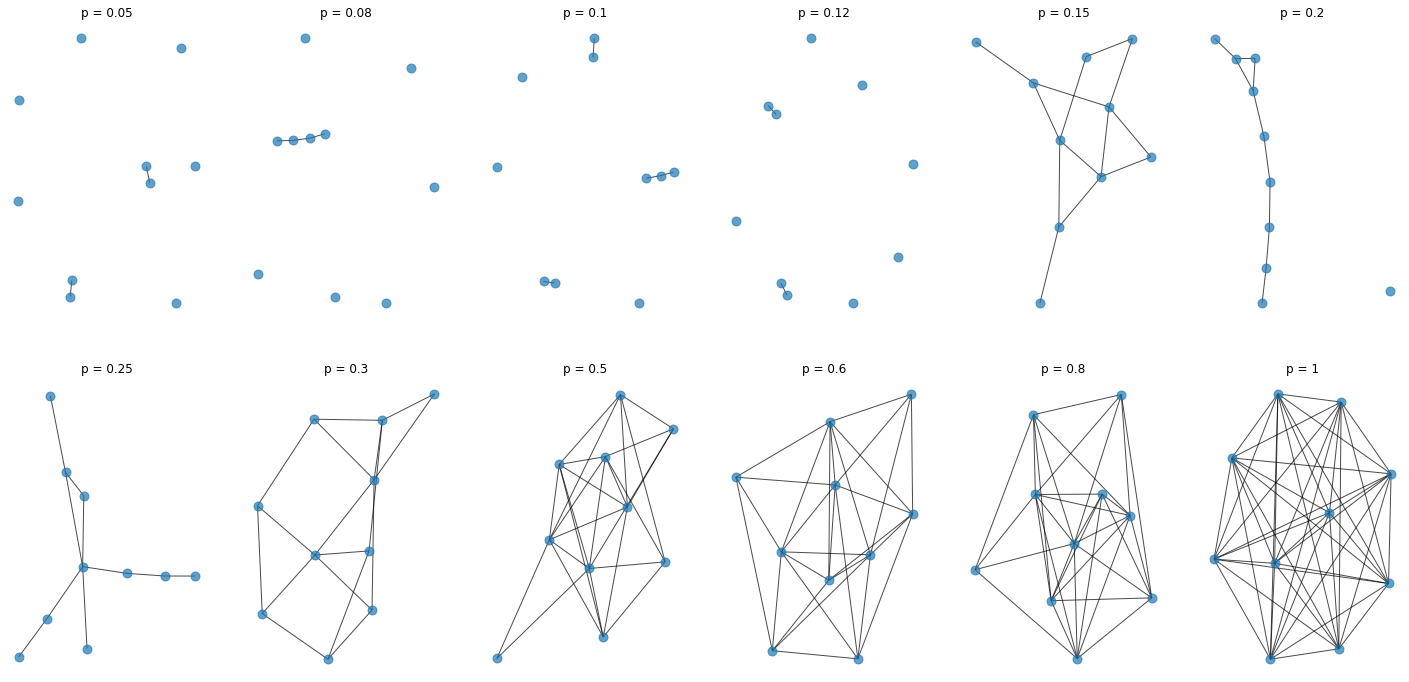

20 Nodes ER Graph


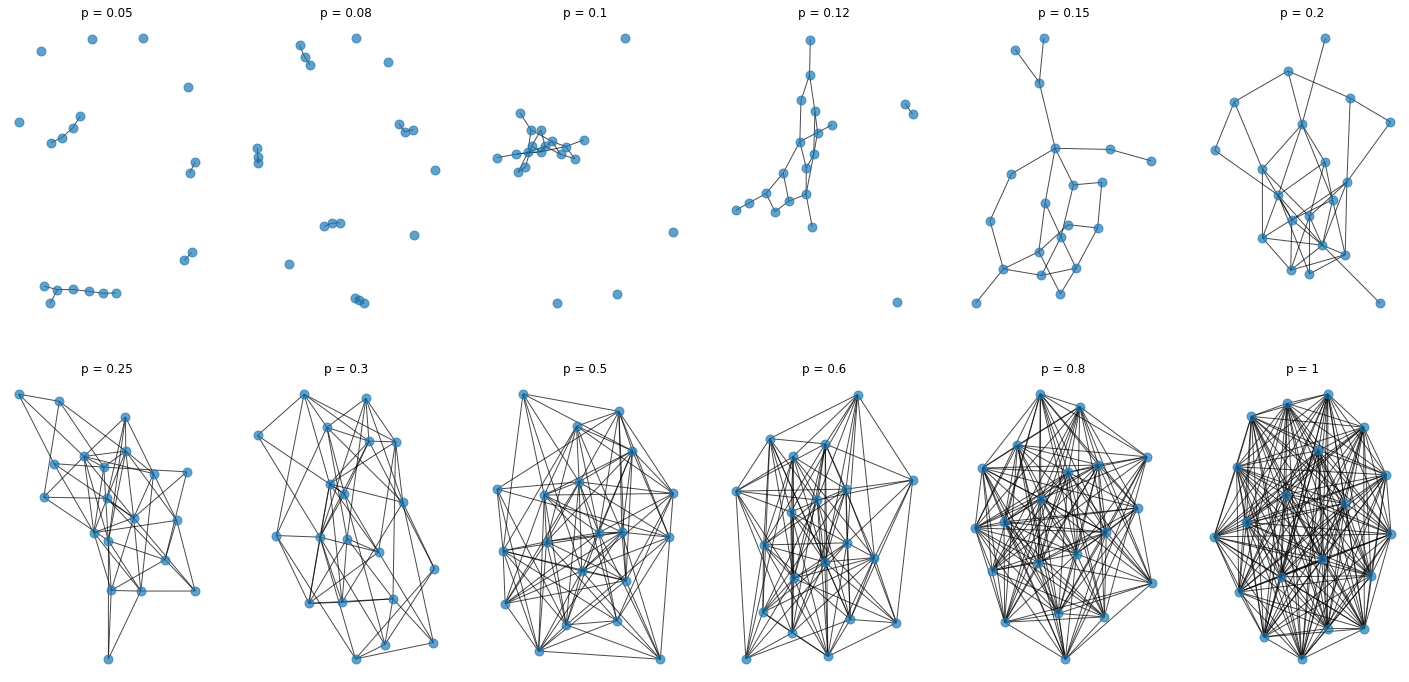

In [0]:
figsize(25,12)
print('10 Nodes ER Graph')
for i,p in enumerate([0.05,0.08,0.1,0.12,0.15,0.2,0.25,0.3,0.5,0.6,0.8,1]):
    plt.subplot(2,6,i+1)
    G = erdos_renyi(10,p,from_adjacency= False)
    nx.draw(G,node_size = 80,alpha = 0.7)
    plt.title('p = {}'.format(p))
plt.show()

print('20 Nodes ER Graph')
for i,p in enumerate([0.05,0.08,0.1,0.12,0.15,0.2,0.25,0.3,0.5,0.6,0.8,1]):
    plt.subplot(2,6,i+1)
    G = erdos_renyi(20,p,from_adjacency= False)
    nx.draw(G,node_size = 80,alpha = 0.7)
    plt.title('p = {}'.format(p))
plt.show()

## 2. Configuration Model - null model

In [0]:
G = nx.karate_club_graph()
clubs = {n:d['club'] for n, d in G.nodes(data = True)}
clubs_int = {n:1 if c == 'Mr. Hi' else 2 for n,c in clubs.items()}
colors = [c for n,c in clubs_int.items()]

In [0]:
def config_graph(G,seed = None):
    '''Simple implementation of Configuration Model'''
    if seed:
        np.random.seed(seed)
    vertex = []
    for n1,n2 in G.edges():
        vertex.append(n1)
        vertex.append(n2)
    return nx.from_edgelist(np.random.permutation(vertex).reshape((-1,2)))

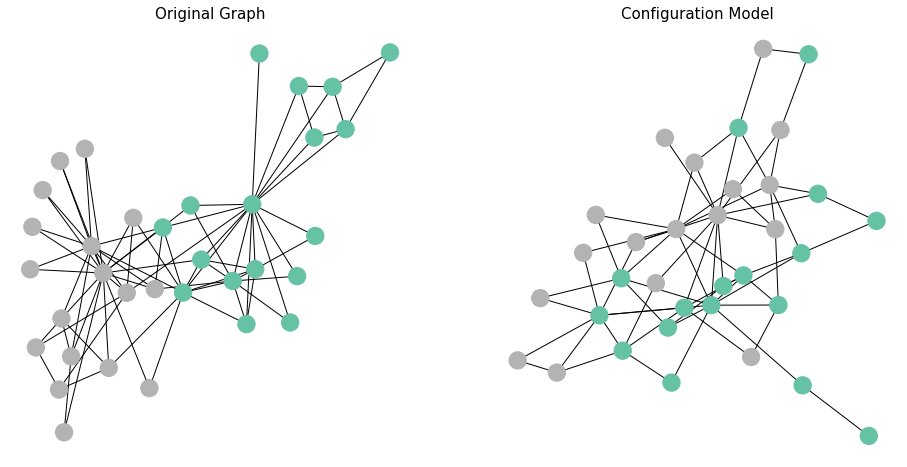

In [0]:
C = config_graph(G,1)
clubs_c_int = [clubs_int[n] for n in C.nodes()]

figsize(16,8)
plt.subplot(1,2,1)
plt.title('Original Graph',fontsize = 15)
nx.draw(G,node_color = colors,cmap = plt.get_cmap('Set2'))
plt.subplot(1,2,2)
plt.title('Configuration Model',fontsize = 15)
nx.draw(C,node_color = clubs_c_int,cmap = plt.get_cmap('Set2'))
plt.show()

**networkx configurattion model**

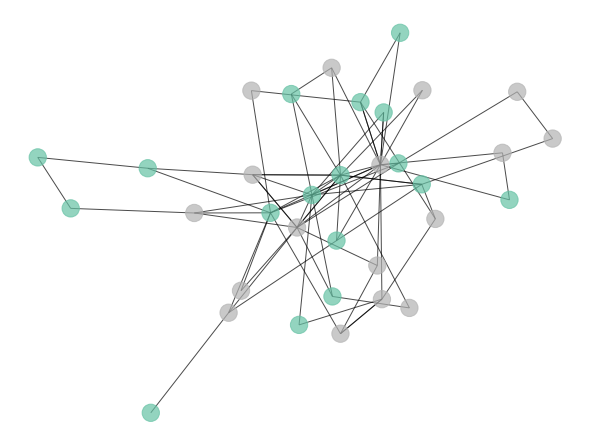

In [0]:
figsize(8,6)
C1 = nx.configuration_model([d for n,d in G.degree()],seed = 1)
nx.draw(C1,node_color = colors,alpha = 0.7,cmap = plt.get_cmap('Set2'))